In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [233]:
dataset = pd.read_csv('/content/Mall_Customers.csv.xls')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Pre-prosecamiento de los datos**

In [234]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [235]:
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [236]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [237]:
dataset.shape

(200, 5)

In [238]:
# Cuenta los valores nulos en cada columna del DataFrame
null_values = dataset.isnull().sum()

# Muestra los valores nulos por columna
print(null_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [239]:
dataset.dropna(inplace=True)

In [240]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [241]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

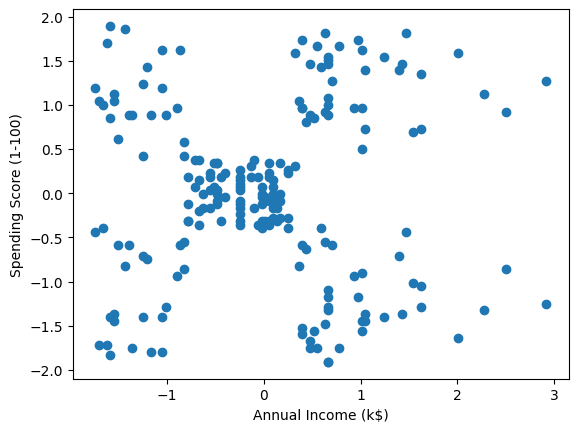

In [242]:
def distribucionDatos():
  plt.scatter(X_std[:, 0], X_std[:, 1])
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.show()

distribucionDatos()

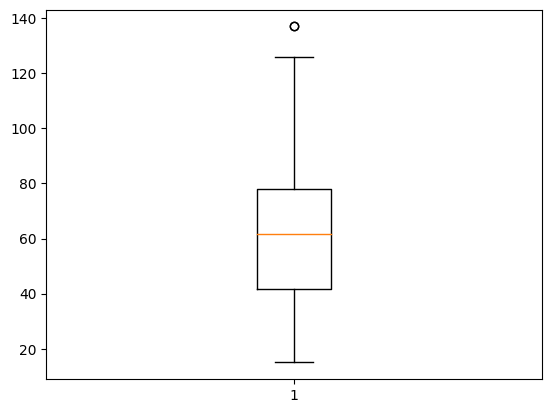

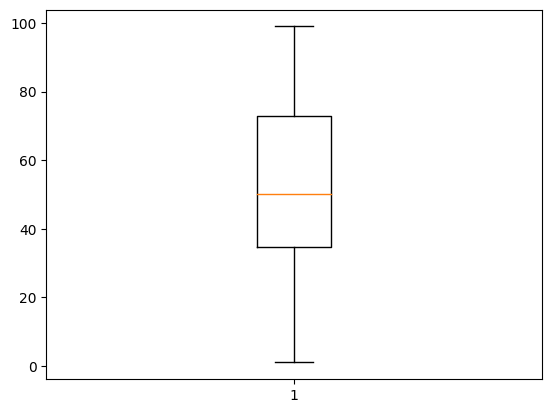

In [243]:
#Datos atípicos por atributo
plt.boxplot(dataset['Annual Income (k$)'])
plt.show()
plt.boxplot(dataset['Spending Score (1-100)'])
plt.show()

# **Decidir el número de clusters:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

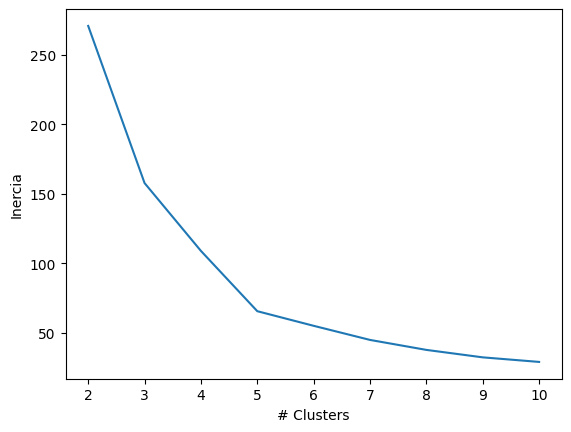

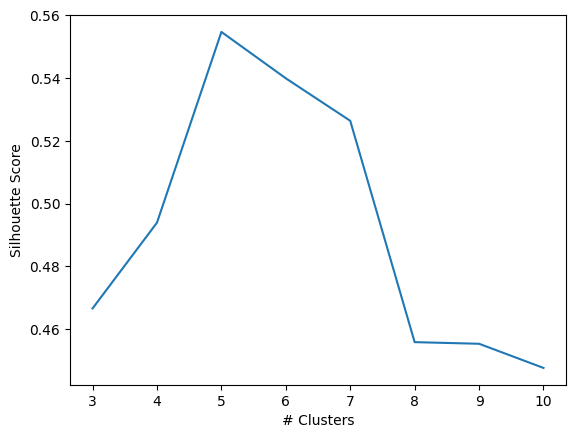

In [244]:
def NclustersKmeans():
  inercia = []
  silhouette_scores = []

  for k in range(2, 11):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X_std)
      inercia.append(kmeans.inertia_)
      
      if k > 2:
          silhouette_scores.append(silhouette_score(X_std, kmeans.labels_))

  plt.plot(range(2, 11), inercia)
  plt.xlabel('# Clusters')
  plt.ylabel('Inercia')
  plt.show()

  plt.plot(range(3, 11), silhouette_scores)
  plt.xlabel('# Clusters')
  plt.ylabel('Silhouette Score')
  plt.show()


NclustersKmeans()

De las graficas anteriores, se puede deducir que el numeros clusters necesarios para este dataset es 5.

# **K-MEDIAS**

In [245]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


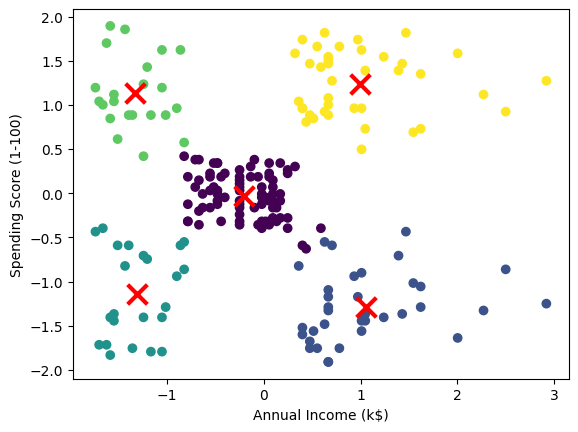

In [246]:
# Ajusta el modelo de K-medias
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_std)

# Obtiene las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Grafica los clusters y los centroides
plt.scatter(X_std[:,0], X_std[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [247]:
# Agrega las etiquetas de los clusters al DataFrame de los clientes
dataset['Cluster'] = kmeans.labels_

# Identifica los clusters que tienen los puntajes de gastos más altos y los ingresos más altos
high_spending_clusters = dataset.groupby('Cluster').mean()
high_spending_clusters = high_spending_clusters.sort_values(by=['Spending Score (1-100)', 'Annual Income (k$)'], ascending=[False, False])
high_spending_clusters = high_spending_clusters.head(2)

# Filtra los clientes que pertenecen a los clusters de interés
customers_to_target = dataset[dataset['Cluster'].isin(high_spending_clusters.index)]

cont = 0
list_people = []
# calcula a quien ofrecer el producto
for index, row in customers_to_target.iterrows():
    if row['Annual Income (k$)'] > 50 and row['Spending Score (1-100)'] > 70:
        #print(f"Email enviado a {row['CustomerID']}")
        list_people.append(row['CustomerID'])
        cont += 1

<ipython-input-247-fb994987e27d>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  high_spending_clusters = dataset.groupby('Cluster').mean()


In [248]:
print('La cantidad de personas que se les puede ofrecer el producto es:', cont)

La cantidad de personas que se les puede ofrecer el producto es: 35


In [249]:
for i in range(len(list_people)):
  print("Se les puede ofrecer el producto a las personas con id:", list_people[i])

Se les puede ofrecer el producto a las personas con id: 124
Se les puede ofrecer el producto a las personas con id: 126
Se les puede ofrecer el producto a las personas con id: 128
Se les puede ofrecer el producto a las personas con id: 130
Se les puede ofrecer el producto a las personas con id: 132
Se les puede ofrecer el producto a las personas con id: 134
Se les puede ofrecer el producto a las personas con id: 136
Se les puede ofrecer el producto a las personas con id: 138
Se les puede ofrecer el producto a las personas con id: 140
Se les puede ofrecer el producto a las personas con id: 142
Se les puede ofrecer el producto a las personas con id: 144
Se les puede ofrecer el producto a las personas con id: 146
Se les puede ofrecer el producto a las personas con id: 148
Se les puede ofrecer el producto a las personas con id: 150
Se les puede ofrecer el producto a las personas con id: 152
Se les puede ofrecer el producto a las personas con id: 154
Se les puede ofrecer el producto a las p

# **Métricas para K-MEANS**

In [250]:
# Para K-medias
print('WCSS:', kmeans.inertia_)
print('BCSS:', kmeans.score(X_std))
print('Davies-Bouldin Index:', davies_bouldin_score(X_std, kmeans.labels_))
print('Silhouette Score:', silhouette_score(X_std, kmeans.labels_))


WCSS: 65.56840815571681
BCSS: -65.56840815571681
Davies-Bouldin Index: 0.5722356162263352
Silhouette Score: 0.5546571631111091


Estas metricas se pueden interpretar de la siguiente forma:


* **WCSS (Within-Cluster Sum of Squares):** El objetivo del algoritmo de K-medias es minimizar el WCSS, ya que esto indica que los puntos dentro de cada cluster están más cercanos entre sí y más lejos de los puntos de otros clusters.
*   **BCSS (Between-Cluster Sum of Squares):**  El BCSS mide la separación entre los clusters y su objetivo es maximizar la distancia entre los clusters.

* **Índice de Davies-Bouldin:** Cuanto menor sea el índice de Davies-Bouldin, mejor será la calidad del clustering.

*   **Coeficiente de silueta:** El coeficiente desilueta varía entre -1 y 1, y cuanto mayor sea su valor, mejor será la calidad del clustering. Si el valor es negativo, indica que el punto está más cercano a los puntos de otros clusters que a los de su propio cluster.






Según lo anterior, se puede concluir que:

* **WCSS:** $65.56840815571681$ Este valor sugiere que los puntos dentro de cada cluster están relativamente cercanos entre sí. 

* **BCSS:** $-65.56840815571681$ El valor de BCSS es negativo $(-65.56)$. Este valor sugiere que los centroides de los clusters están relativamente cercanos al centroide global. 

* **Índice de Davies-Bouldin:** $0.5722356162263352$ Este valor indica que la calidad del clustering es relativamente buena. 

* **Coeficiente de silueta:** $0.5546571631111091$ Este valor indica que los puntos dentro de cada cluster son similares entre sí y están bien separados de los puntos en otros clusters.

# **Mezcla de Gaussianas**

# **Decidir Número de Clusters**

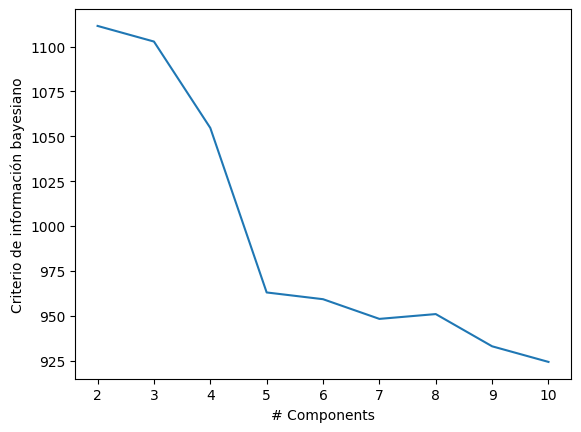

In [251]:
def NclustersGMM():
  aic_scores = []

  for k in range(2, 11):
      gmm = GaussianMixture(n_components=k, random_state=42)
      gmm.fit(X_std)
      aic_scores.append(gmm.aic(X_std))

  plt.plot(range(2, 11), aic_scores)
  plt.xlabel('# Components')
  plt.ylabel('Criterio de información bayesiano')
  plt.show()

NclustersGMM()

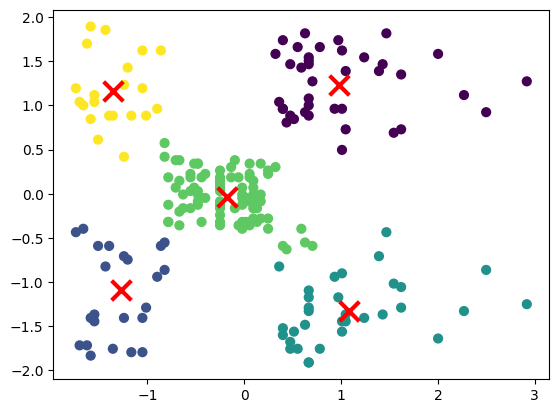

In [252]:
from sklearn.mixture import GaussianMixture

# Ajustamos la función de mezcla de Gaussianas a los datos
gmm = GaussianMixture(n_components=5).fit(X_std)
labels = gmm.predict(X_std)
probs = gmm.predict_proba(X_std)

# Calculamos los centros de masa de cada cluster
centers = np.zeros((5, 2))
for i in range(5):
    centers[i, :] = np.average(X_std, axis=0, weights=probs[:, i])

# Graficamos los datos y los centros de masa
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [253]:
# Agregamos las etiquetas de los clusters al DataFrame de los clientes
dataset['Cluster'] = labels

# Identificamos los clusters que tienen los puntajes de gastos más altos y los ingresos más altos
high_spending_clusters = dataset.groupby('Cluster').mean()
high_spending_clusters = high_spending_clusters.sort_values(by=['Spending Score (1-100)', 'Annual Income (k$)'], ascending=[False, False])
high_spending_clusters = high_spending_clusters.head(2)

# Filtramos los clientes que pertenecen a los clusters de interés
customers_to_target = dataset[dataset['Cluster'].isin(high_spending_clusters.index)]

# Creamos una lista de personas a las que ofrecer el producto
list_people = customers_to_target[(customers_to_target['Annual Income (k$)'] > 50) & (customers_to_target['Spending Score (1-100)'] > 70)]['CustomerID'].tolist()


<ipython-input-253-a15c20433f85>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  high_spending_clusters = dataset.groupby('Cluster').mean()


In [254]:
# Imprimimos la lista de personas a las que ofrecer el producto
#print(f"Se enviará un correo electrónico a las siguientes personas: {list_people}")
print("La cantidad que se les puede ofrecer el producto es:",len(list_people))
for i in range(len(list_people)):
  print("Se les puede ofrecer el producto a las personas con id:", list_people[i]) 

La cantidad que se les puede ofrecer el producto es: 35
Se les puede ofrecer el producto a las personas con id: 124
Se les puede ofrecer el producto a las personas con id: 126
Se les puede ofrecer el producto a las personas con id: 128
Se les puede ofrecer el producto a las personas con id: 130
Se les puede ofrecer el producto a las personas con id: 132
Se les puede ofrecer el producto a las personas con id: 134
Se les puede ofrecer el producto a las personas con id: 136
Se les puede ofrecer el producto a las personas con id: 138
Se les puede ofrecer el producto a las personas con id: 140
Se les puede ofrecer el producto a las personas con id: 142
Se les puede ofrecer el producto a las personas con id: 144
Se les puede ofrecer el producto a las personas con id: 146
Se les puede ofrecer el producto a las personas con id: 148
Se les puede ofrecer el producto a las personas con id: 150
Se les puede ofrecer el producto a las personas con id: 152
Se les puede ofrecer el producto a las perso

# **Métricas Mezcla de Gaussianas**

In [255]:
print('Log-Likehood:',gmm.score(X_std))
print('BIC:',gmm.bic(X_std))
print('AIC:',gmm.aic(X_std))

Log-Likehood: -2.2625026219732405
BIC: 1058.6522524191892
AIC: 963.0010487892962


En este caso, los valores de las métricas son:


* **Log-Likehood:** $-2.3481777079539534$
* **BIC:** $1092.9222868114744$
* **AIC:** $997.2710831815814$

* **El valor de la log-verosimilitud:** es negativo, lo que puede parecer extraño, pero es común en la mezcla de Gaussianas debido a la forma en que se calcula. El valor negativo en sí mismo no tiene una interpretación directa, pero se puede utilizar para comparar diferentes modelos de mezcla de Gaussianas ajustados a los mismos datos. En general, cuanto mayor sea el valor de la log-verosimilitud negativa, mejor será el ajuste del modelo a los datos.

* **El valor del BIC:** es positivo y bastante alto, lo que sugiere que el modelo podría no ser muy bueno. En general, se espera que el valor del BIC sea menor para modelos mejores. El BIC es útil para seleccionar el número óptimo de componentes de mezcla, ya que penaliza la complejidad del modelo.

* **El valor del AIC:** es positivo y menor que el valor del BIC, lo que sugiere que el modelo podría ser razonablemente bueno. El AIC es similar al BIC en que penaliza la complejidad del modelo, pero tiene una penalización menor por lacomplejidad, lo que significa que puede ser más propenso a seleccionar modelos más complejos que el BIC.


# **Explicación de lo realizado este archivo**

* **Plan de ajuste de los datos:** Se planea revisar si el dataset contiene datos nulos, datos atípicos. Según el resultado que nos de se tomará la decisión de si eliminarlos o reemplazarlos, Se analizará cada atributo para determinar si es relevante para construir el modelo. Por último se planea normalizar los datos.
* **Preprocesamiento:** Se revisó el tipo de los datos, se decidió eliminar el Customer ID ya que no afecta para nada que una persona compre o no el producto y la edad y el género se vuelven irrelevantes sabiendo que son independientes de cuánto gana la persona. Teniendo en cuenta esto, se evidenció que el dataset no tenía datos nulos y solo tenia un dato atípico y por último se normalizaron los datos. No se hizo ningún encoder ya que solo se trabajó con datos numéricos.

* **Entrenamiento de los modelos:** Después de decidir el número de clusters con los criterios vistos en clase, se entrenaron los modelos y se obtuvieron los siguientes resultados de manera gráfica:

K-means:
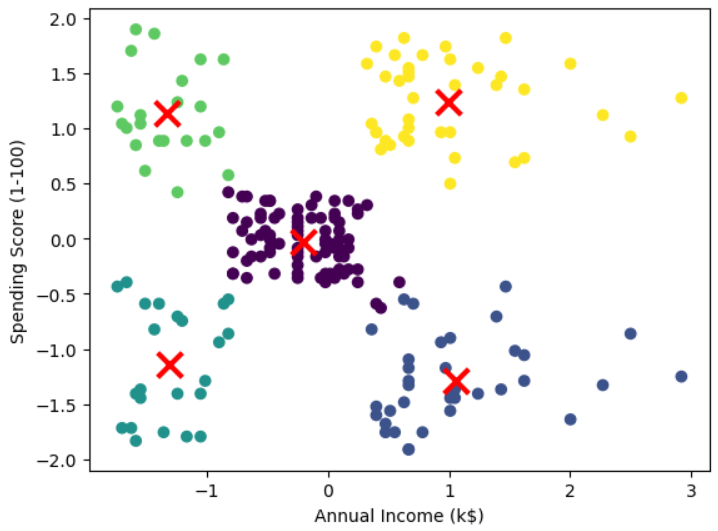

Mezcla de gaussianas:


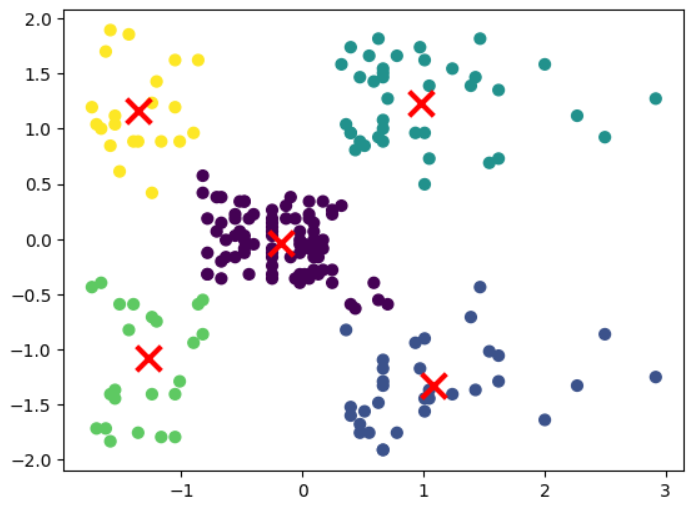

Se puede ver que los resultados obtenidos en ambos modelos son coherentes.

* **Elección de la cantidad de grupos:** Se eligió el número de grupos o clusters mediante los criterios vistos en clase para K-MEANS, adicionalmente, se investigó qué método se debe usar para el número de clusters de mezcla de gaussianas que es un método similar. En ambos resultados nos dío que el número de grupos o clusters debe ser 5.

* Análisis de los resultados: En la sección de cada modelo se explica a fondo cada una de las métricas obtenidas. Teniendo en cuenta esto se puede ver que las personas a las que se les puede ofrecer el producto tienen caracteristicas muy similares. Por último la grupación de los clusters dío muy parecido entre modelos.